<a href="https://colab.research.google.com/github/Ida-bit97/HWAG_audience_analysis/blob/main/HWAG_survey_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [ ]:
#importing modules to be applied
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [ ]:
#downloading data
df = pd.read_excel('hwag_for_python.xlsx', header=0)
df.head(3)

,What’s your age?,Please select your gender,How long have you been living in Denmark?,Do you feel you need support in your job search?,What is the main barrier you face in your job search in Denmark? (Select only one),What type of job are you primarily seeking?,Same profession as in a home country,Other profession than in a home country,Not sure or any available job,"There are many organisations that help newcomers adjust after their relocation. \nWhen choosing an organisation to help you settle after relocation, which factors matter most? (Select up to 3)",...,Website and clarity of info,Services offered,Cost of participation,Accessibility,Individual sessions with a mentor,Group sessions with a mentor,A specific toolkit to work on your own (book with worksheets and/or workbook) with a feedback,"A free unsupervised community (e.g., an online group)",What formats of assistance would you be willing to pay for?,How much would you be willing to pay per month for help with finding a job and adapting to a new country?
0,52,Female,More than 10 years,Yes,Difficulty transferring previous experience/qu...,I’m not sure yet,0,0,1,"Website and clarity of information provided, S...",...,1.0,1.0,1.0,1.0,Yes,Yes,Yes,Yes,Monthly individual sessions with a mentor,"Would prefer to pay for the product, not for a..."
1,26,Female,Less than 6 months,I am not sure...,Lack of local network/contacts,"Same profession as in your home country, Any a...",1,0,1,"Recommendations from friends/other expats, Onl...",...,NaN,NaN,NaN,NaN,Not sure,Not sure,Not sure,Yes,Not ready to pay at all,NaN
2,27,Female,1 - 5 years,Yes,Lack of local network/contacts,Same profession as in your home country,1,0,0,"Recommendations from friends/other expats, Web...",...,1.0,NaN,1.0,NaN,Yes,Yes,Not sure,Not sure,Not ready to pay at all,NaN


In [ ]:
#dropping cols that are already transformed into dummies
df = df.drop(["What is the main barrier you face in your job search in Denmark? (Select only one)",
              "There are many organisations that help newcomers adjust after their relocation. \nWhen choosing an organisation to help you settle after relocation, which factors matter most? (Select up to 3)",
              "What type of job are you primarily seeking?",
              "How much would you be willing to pay per month for help with finding a job and adapting to a new country?"], axis=1)

In [ ]:
#finding out data types
df.dtypes

#we need to transform

,0
What’s your age?,int64
Please select your gender,object
How long have you been living in Denmark?,object
Do you feel you need support in your job search?,object
Same profession as in a home country,int64
Other profession than in a home country,int64
Not sure or any available job,int64
Recommendations,float64
Online rewiews and testimonials,float64
Website and clarity of info,float64


In [ ]:
#preprocessing duration of living in Dk
df["How long have you been living in Denmark?"].unique()

array(['More than 10 years', 'Less than 6 months', '1 - 5 years',
       '6 months - 1 year'], dtype=object)

In [ ]:
df['How long have you been living in Denmark?'] = np.where(df['How long have you been living in Denmark?'] == 'Less than 6 months', 1, df['How long have you been living in Denmark?'])
df['How long have you been living in Denmark?'] = np.where(df['How long have you been living in Denmark?'] == '6 months - 1 year', 2, df['How long have you been living in Denmark?'])
df['How long have you been living in Denmark?'] = np.where(df['How long have you been living in Denmark?'] == '1 - 5 years', 3, df['How long have you been living in Denmark?'])
df['How long have you been living in Denmark?'] = np.where(df['How long have you been living in Denmark?'] == 'More than 10 years', 4, df['How long have you been living in Denmark?'])

df['How long have you been living in Denmark?'] = df['How long have you been living in Denmark?'].astype('int')

In [ ]:
df["How long have you been living in Denmark?"].unique()

array([4, 1, 3, 2])

In [ ]:
#preprocessing of request for help
df['Do you feel you need support in your job search?'].value_counts()

,count
Do you feel you need support in your job search?,
Yes,24
I am not sure...,4
No,2


In [ ]:
df['Do you feel you need support in your job search?'] = np.where(df['Do you feel you need support in your job search?'] == 'Yes', 1, df['Do you feel you need support in your job search?'])
df['Do you feel you need support in your job search?'] = np.where((df['Do you feel you need support in your job search?'] == 'No') | (df['Do you feel you need support in your job search?'] == 'I am not sure...'), 0, df['Do you feel you need support in your job search?'])

In [ ]:
df['Do you feel you need support in your job search?'].value_counts()

,count
Do you feel you need support in your job search?,
1,24
0,6


In [ ]:
list_of_nacols = ['Recommendations ', 'Online rewiews and testimonials', 'Website and clarity of info', 'Services offered',
                  'Cost of participation', 'Accessibility']

for col_name in range(len(list_of_nacols)):
 df[list_of_nacols[col_name]] = df[list_of_nacols[col_name]].fillna(0)

In [ ]:
df.columns

Index(['What’s your age?', 'Please select your gender',
       'How long have you been living in Denmark?',
       'Do you feel you need support in your job search?',
       'Same profession as in a home country',
       'Other profession than in a home country ',
       'Not sure or any available job', 'Recommendations ',
       'Online rewiews and testimonials', 'Website and clarity of info',
       'Services offered', 'Cost of participation', 'Accessibility',
       'Individual sessions with a mentor', 'Group sessions with a mentor',
       'A specific toolkit to work on your own (book with worksheets and/or workbook) with a feedback',
       'A free unsupervised community (e.g., an online group)',
       'What formats of assistance would you be willing to pay for?'],
      dtype='object')

In [ ]:
list_of_formats_of_help = df.columns[13:17]

In [ ]:
for i in range(len(list_of_formats_of_help)):
  df[list_of_formats_of_help[i]] = np.where(df[list_of_formats_of_help[i]] == 'Yes', 1, df[list_of_formats_of_help[i]])
  df[list_of_formats_of_help[i]] = np.where((df[list_of_formats_of_help[i]] == 'No') | (df[list_of_formats_of_help[i]] == 'Not sure'), 0, df[list_of_formats_of_help[i]])

In [ ]:
df['What formats of assistance would you be willing to pay for?'].value_counts()

,count
What formats of assistance would you be willing to pay for?,
Not ready to pay at all,15
Monthly individual sessions with a mentor,8
"A specific methodology to work on your own, step by step, with comments from tutor",6
List of expat-friendly vacancies or refferals,1


I decided to transform the last column in a way that we would have binary category which reflects readiness to pay in general.

In [ ]:
df.rename(columns={"What formats of assistance would you be willing to pay for?": "Readiness to pay"}, inplace = True)

In [ ]:
df["Readiness to pay"] = np.where(df["Readiness to pay"] != "Not ready to pay at all", 1, df["Readiness to pay"])
df["Readiness to pay"] = np.where(df["Readiness to pay"] == "Not ready to pay at all", 0, df["Readiness to pay"])

In [ ]:
df.head(3)

,What’s your age?,Please select your gender,How long have you been living in Denmark?,Do you feel you need support in your job search?,Same profession as in a home country,Other profession than in a home country,Not sure or any available job,Recommendations,Online rewiews and testimonials,Website and clarity of info,Services offered,Cost of participation,Accessibility,Individual sessions with a mentor,Group sessions with a mentor,A specific toolkit to work on your own (book with worksheets and/or workbook) with a feedback,"A free unsupervised community (e.g., an online group)",Readiness to pay
0,52,Female,4,1,0,0,1,0.0,0.0,1.0,1.0,1.0,1.0,1,1,1,1,1
1,26,Female,1,0,1,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0
2,27,Female,3,1,1,0,0,1.0,0.0,1.0,0.0,1.0,0.0,1,1,0,0,0


In [ ]:
df["Please select your gender"] = np.where(df["Please select your gender"] == "Female", 1, df["Please select your gender"])
df["Please select your gender"] = np.where(df["Please select your gender"] == "Male", 0, df["Please select your gender"])
df["Please select your gender"] = np.where(df["Please select your gender"] == 'Non-binary', 0.5, df["Please select your gender"])

In [ ]:
df.head(3)

,What’s your age?,Please select your gender,How long have you been living in Denmark?,Do you feel you need support in your job search?,Same profession as in a home country,Other profession than in a home country,Not sure or any available job,Recommendations,Online rewiews and testimonials,Website and clarity of info,Services offered,Cost of participation,Accessibility,Individual sessions with a mentor,Group sessions with a mentor,A specific toolkit to work on your own (book with worksheets and/or workbook) with a feedback,"A free unsupervised community (e.g., an online group)",Readiness to pay
0,52,1,4,1,0,0,1,0.0,0.0,1.0,1.0,1.0,1.0,1,1,1,1,1
1,26,1,1,0,1,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0
2,27,1,3,1,1,0,0,1.0,0.0,1.0,0.0,1.0,0.0,1,1,0,0,0


In [ ]:
"""df.rename(columns= {'What’s your age?': "Age",
          'Please select your gender': "Gender",
          'How long have you been living in Denmark?': "In_Denmark_cat",
          'Do you feel you need support in your job search?': "Support",
          'Same profession as in a home country': "Career_same",
          'Other profession than in a home country ': "Career_diff",
          'Not sure or any available job': "Career_undecided",
          'Recommendations ': 'Importance_Recommendations',
          'Online rewiews and testimonials': 'Importance_online_help',
          'Website and clarity of info': 'Importance_website_info',
          'Services offered': 'Importance_services',
          'Cost of participation': 'Importance_cost',
          'Accessibility': 'Importance_accessability',
          'Individual sessions with a mentor': "Format_individual",
          'Group sessions with a mentor': "Format_group",
          'A specific toolkit to work on your own (book with worksheets and/or workbook) with a feedback': "Format_toolkit",
          'A free unsupervised community (e.g., an online group)': "Format_community",
          'Readiness to pay': "Readiness_payment"})"""

'df.rename(columns= {\'What’s your age?\': "Age", \n          \'Please select your gender\': "Gender",\n          \'How long have you been living in Denmark?\': "In_Denmark_cat",\n          \'Do you feel you need support in your job search?\': "Support",\n          \'Same profession as in a home country\': "Career_same",\n          \'Other profession than in a home country \': "Career_diff",\n          \'Not sure or any available job\': "Career_undecided", \n          \'Recommendations \': \'Importance_Recommendations\',\n          \'Online rewiews and testimonials\': \'Importance_online_help\', \n          \'Website and clarity of info\': \'Importance_website_info\',\n          \'Services offered\': \'Importance_services\', \n          \'Cost of participation\': \'Importance_cost\', \n          \'Accessibility\': \'Importance_accessability\',\n          \'Individual sessions with a mentor\': "Format_individual", \n          \'Group sessions with a mentor\': "Format_group",\n          

In [ ]:
#normalizing all the data
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.90625,1.0,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.09375,1.0,0.000000,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.12500,1.0,0.666667,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.18750,1.0,0.666667,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.06250,0.0,0.333333,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
5,0.96875,1.0,0.666667,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
6,0.21875,0.5,0.333333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7,0.37500,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
8,0.09375,0.0,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
9,0.46875,0.0,0.666667,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


In [ ]:
df.rename(columns= {0: "Age",
          1: "Gender",
          2: "In_Denmark_cat",
          3: "Support",
          4: "Career_same",
          5: "Career_diff",
          6: "Career_undecided",
          7: 'Importance_Recommendations',
          8: 'Importance_online_help',
          9: 'Importance_website_info',
          10: 'Importance_services',
          11: 'Importance_cost',
          12: 'Importance_accessability',
          13: "Format_individual",
          14: "Format_group",
          15: "Format_toolkit",
          16: "Format_community",
          17: "Readiness_payment"}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         30 non-null     float64
 1   Gender                      30 non-null     float64
 2   In_Denmark_cat              30 non-null     float64
 3   Support                     30 non-null     int64  
 4   Career_same                 30 non-null     int64  
 5   Career_diff                 30 non-null     int64  
 6   Career_undecided            30 non-null     int64  
 7   Importance_Recommendations  30 non-null     int64  
 8   Importance_online_help      30 non-null     int64  
 9   Importance_website_info     30 non-null     int64  
 10  Importance_services         30 non-null     int64  
 11  Importance_cost             30 non-null     int64  
 12  Importance_accessability    30 non-null     int64  
 13  Format_individual           30 non-nu

In [ ]:
df.to_excel(".xlsx")

# Analysis

In [ ]:
from sklearn import linear_model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV, learning_curve
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import plotly.express as px

In [ ]:
df = pd.read_excel("Transformed_hwag_python.xlsx", header=0)

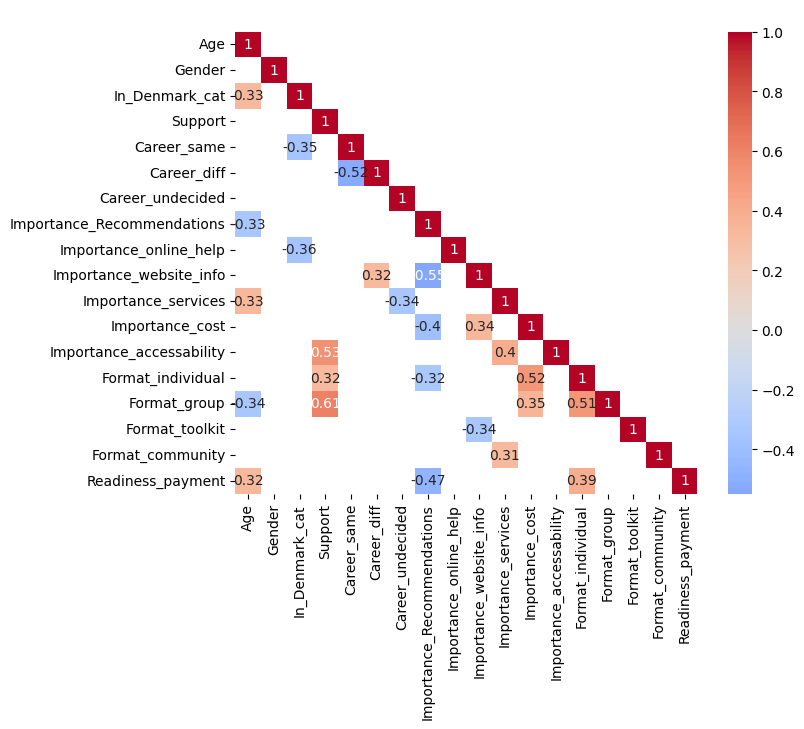

In [ ]:
#correlation matrix illustrating the presence (or the opposite) of linear relationship
corr = df.corr()

threshold = 0.3
filtered_corr = corr.where(abs(corr) >= threshold, other=np.nan)

mask = np.triu(np.ones_like(filtered_corr, dtype=bool), k=1)

plt.figure(figsize=(8, 6))
sns.heatmap(filtered_corr, mask=mask, annot=True, cmap='coolwarm', center=0, square=True)
plt.title(' '.format(threshold))
plt.show()

**Key conclusions driven from correlation matrix:**

* No strong linear relationship was found between willingness to
pay and any of the identified factors.

* A slightly positive correlation was observed between willingness to pay and preferred INDIVIDUAL assistance format.

* A moderately significant inverse relationship was noted between willingness to pay and the importance of friend recommendations in a search for helping organisation.

* Individuals seeking external assistance often value group interaction as an assistance format, with accessibility being crucial when selecting a support organisation.

* Those who prefer individual assistance highlighted the significant cost of the services provided.

Taking into consideration small size of the sample to analyze and binary dependent variable it makes sense to apply logistic regression model.

In [ ]:
#extracting dependent and independent variables
features, target = df.columns[:-1], df.columns[-1]

X = df[features]
y = df[target]

In [ ]:
#splitting data into train and test subsamples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#training logistic model
logr = linear_model.LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#gettin coefficients for all the parameters (and their significance)
coefficients = logr.coef_[0]
odds_ratios = np.exp(coefficients)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})
print("\nFeature Importance (Coefficient and Odds Ratio):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))


Feature Importance (Coefficient and Odds Ratio):
                       Feature  Coefficient  Odds Ratio
0                          Age     0.792292    2.208452
4                  Career_same     0.705197    2.024245
15              Format_toolkit     0.686452    1.986654
13           Format_individual     0.632394    1.882111
11             Importance_cost     0.505290    1.657467
2               In_Denmark_cat     0.366085    1.442078
16            Format_community     0.300942    1.351131
1                       Gender     0.260788    1.297952
10         Importance_services     0.258101    1.294469
14                Format_group    -0.107689    0.897907
9      Importance_website_info    -0.149035    0.861539
3                      Support    -0.159483    0.852585
12    Importance_accessability    -0.241034    0.785815
5                  Career_diff    -0.276134    0.758711
6             Career_undecided    -0.358512    0.698715
8       Importance_online_help    -0.454676    0.63465

Given the value of the odds ratios, we can see factors that **positively** **influence** payment readiness, such as:

*   Age; Same career trajectory; Toolkit as a preferrable format of help (and other which odds ratio are bigger than 1)

and factors that **decrease chances of payment**, such as:

* Uncertainty about career track; preferrable group format of help (and the rest with odd ratio < 1)



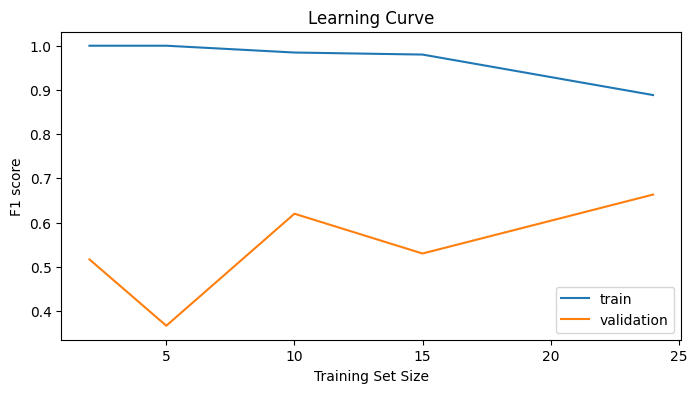

In [ ]:
#checking learning performance
train_sizes, train_scores, test_scores = learning_curve(
    estimator=logr,
    X=X,
    y=y,
    cv=5,
    scoring="f1",
    train_sizes = [2, 5, 10, 15, 24]
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.subplots(figsize=(8,4))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("F1 score")
plt.legend(loc="best")

plt.show()

The lesser the distance between validation and training set is, the better the model performs. According to trending lines above our model still does not work at its maximum and can be improved with adding new data.

In [ ]:
y_pred = logr.predict(X_test)
f1_score_quality = f1_score(y_test, y_pred)
print("F1 score: {:.2f}%".format(f1_score_quality * 100))

F1 score: 85.71%


In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[2 1]
 [0 3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



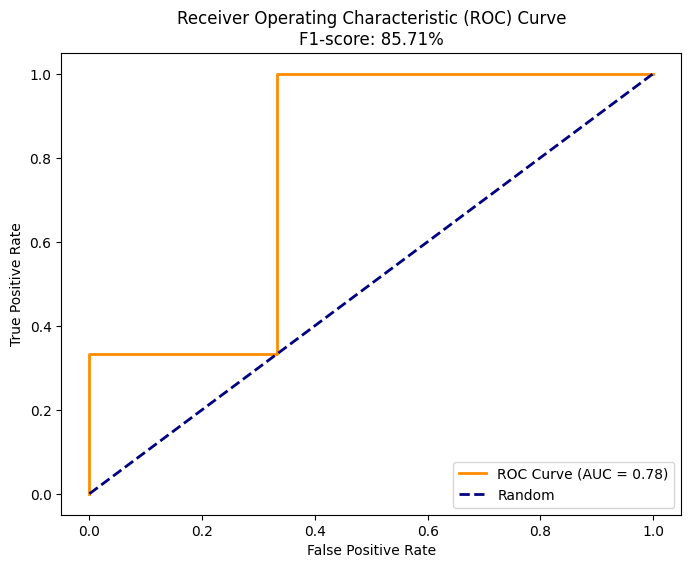

In [ ]:
y_prob = logr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nF1-score: {:.2f}%'.format(
     f1_score_quality* 100))
plt.legend(loc="lower right")
plt.show()

According to the performance metrics, the model performs well; however, we need to validate the results by applying a validation procedure and conducting a grid search with different combinations of parameters.

In [ ]:
#adding leave one out validation (because of a small sample size)
loo = LeaveOneOut()

In [ ]:
param_grid = [
    {'penalty':['l1'],
     'C' : np.logspace(-4,4,20),
     'max_iter': [50, 100, 500, 1000],
     "solver":  ["liblinear", "saga"]
}
]

In [ ]:
clf = GridSearchCV(logr, param_grid = param_grid, cv = loo, verbose=True, n_jobs=-1, scoring="f1")
clf

GridSearchCV(cv=LeaveOneOut(), estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [50, 100, 500, 1000], 'penalty': ['l1'],
                          'solver': ['liblinear', 'saga']}],
             scoring='f1', verbose=True)

In [ ]:
best_clf = clf.fit(X_train, y_train)
best_clf.best_estimator_

Fitting 24 folds for each of 160 candidates, totalling 3840 fits


LogisticRegression(C=np.float64(0.00026366508987303583), max_iter=1000,
                   penalty='l1', solver='saga')

In [ ]:
print(f'F1_score - : {best_clf.score(X_test, y_test):.3f}')

F1_score - : 0.667


Validation of the initial results, which had an F1 score of 85.71, led to a decline in the overall performance of the model but provided more reliable results. However, with the collection of new data, the model has the potential to perform better and more consistently.